<a href="https://colab.research.google.com/github/gabrieldimas/pcvk-study-2023/blob/main/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Library
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import os

Preprocessing

In [4]:
# Direktori tempat gambar-gambar berada
direct_data1 = '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm'
direct_data2 = '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm'
direct_data3 = '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm'
direct_data4 = '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3A_2141720223_1 - Rizky Angkata.jpeg'
direct_data5 = '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3A_2141720223_2 - Rizky Angkata.jpeg'
direct_data6 = '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3A_2141720223_3 - Rizky Angkata.jpeg'
direct_data7 = '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3A_2141720223_4 - Rizky Angkata.jpeg'
direct_data8 = '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3A_2141720223_5 - Rizky Angkata.jpegg'
direct_data9 = '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3D_2141720104_1 - BRILLIYAND NOVAL HERDANA PUTRA.jpeg'
direct_data10 = '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3D_2141720104_2 - BRILLIYAND NOVAL HERDANA PUTRA.jpeg'
direct_data11 = '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3D_2141720104_3 - BRILLIYAND NOVAL HERDANA PUTRA.jpeg'
direct_data12 = '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3D_2141720104_4 - BRILLIYAND NOVAL HERDANA PUTRA.jpeg'
direct_data13 = '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3D_2141720104_5 - BRILLIYAND NOVAL HERDANA PUTRA.jpeg'
direct_data14 = '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/TI-3B_2141720126_1 - IQBAL TAWAKAL.jpg'
direct_data15 = '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/TI-3B_2141720126_2 - IQBAL TAWAKAL.jpg'
direct_data16 = '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/TI-3B_2141720126_3 - IQBAL TAWAKAL.jpg'
direct_data17 = '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/TI-3B_2141720126_4 - IQBAL TAWAKAL.jpg'
direct_data18 = '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/TI-3B_2141720126_5 - IQBAL TAWAKAL.jpg'

# List Direktori
directories = [direct_data1, direct_data2, direct_data3]

# Load HaarCascade untuk deteksi
cascade_wajah = cv2.CascadeClassifier('/content/drive/MyDrive/Kuliah/PCVK/dataset/haarcascade_frontalface_alt.xml')

Face Recognition

In [18]:
# Menggunakan os.listdir untuk mengambil daftar file dalam direktori
for direct_data in directories:
    files = os.listdir(direct_data)

    # Loop melalui semua gambar dalam direktori
    for i, img_file in enumerate(files, start=1):
        img_path = os.path.join(direct_data, img_file)
        img = cv2.imread(img_path)

        # PREPROCESSING
        # (1) Resize the image
        img = cv2.resize(img, (400, 300))

        # (2) Convert to Grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # (3) Histogram Equalization
        equalized_img = cv2.equalizeHist(gray_img)

        # (4) Lokalisasi (Face Detection)
        faces = cascade_wajah.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # SEGEMENTASI DAN RECOGNIZATION
        for (x, y, w, h) in faces:
            # (5) Segmentasi (Crop Wajah)
            face_segment = img[y:y+h, x:x+w]

            # Tampilkan hasil segmentasi dan pengenalan wajah
            plt.figure(figsize=(25, 6))

            # Gambar asli
            plt.subplot(151)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title('Original Image')
            plt.axis('off')

            # Grayscale image (PREPROCESSING)
            plt.subplot(152)
            plt.imshow(gray_img, cmap='gray')
            plt.title('Grayscale')
            plt.axis('off')

            # Equalized Image (PREPROCESSING)
            plt.subplot(153)
            plt.imshow(equalized_img, cmap='gray')
            plt.title('Histogram Equalization')
            plt.axis('off')

            # Gambar Segmentasi Wajah
            plt.subplot(154)
            plt.imshow(cv2.cvtColor(face_segment, cv2.COLOR_BGR2RGB))
            plt.title('Segmented Face')
            plt.axis('off')

            # Gambar dengan kotak di sekitar wajah (Lokalisasi - Face Detection)
            img_with_boxes = img.copy()
            cv2.rectangle(img_with_boxes, (x, y), (x+w, y+h), (0, 255, 0), 2)
            plt.subplot(155)
            plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
            plt.title('Face Detection')
            plt.axis('off')

        # Show the figure for the current image
        plt.show()


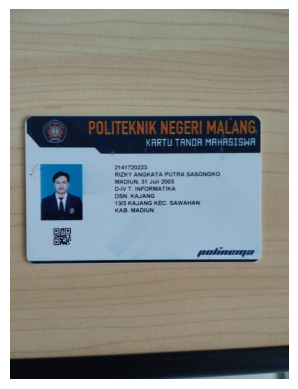

In [22]:
img = cv2.imread('/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3A_2141720223_1 - Rizky Angkata.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

Object and Character Detection

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Daftar path citra
image_paths = [
  '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3A_2141720223_1 - Rizky Angkata.jpeg',
'/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3A_2141720223_2 - Rizky Angkata.jpeg',
'/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3A_2141720223_3 - Rizky Angkata.jpeg',
'/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3A_2141720223_4 - Rizky Angkata.jpeg',
'/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3A_2141720223_5 - Rizky Angkata.jpegg',
'/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3D_2141720104_1 - BRILLIYAND NOVAL HERDANA PUTRA.jpeg',
'/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3D_2141720104_2 - BRILLIYAND NOVAL HERDANA PUTRA.jpeg',
'/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3D_2141720104_3 - BRILLIYAND NOVAL HERDANA PUTRA.jpeg',
'/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3D_2141720104_4 - BRILLIYAND NOVAL HERDANA PUTRA.jpeg',
'/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/3D_2141720104_5 - BRILLIYAND NOVAL HERDANA PUTRA.jpeg',
'/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/TI-3B_2141720126_1 - IQBAL TAWAKAL.jpg',
'/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/TI-3B_2141720126_2 - IQBAL TAWAKAL.jpg',
'/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/TI-3B_2141720126_3 - IQBAL TAWAKAL.jpg',
'/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/TI-3B_2141720126_4 - IQBAL TAWAKAL.jpg',
 '/content/drive/MyDrive/Kuliah/PCVK/dataset/ktm/TI-3B_2141720126_5 - IQBAL TAWAKAL.jpg'
]

def process_image(image_path):
    # Membaca citra KTP dari path tertentu
    ktp = cv2.imread(image_path)

    # Menambahkan border putih sebesar 20 piksel di sekeliling citra KTP
    ktp = cv2.copyMakeBorder(
        src=ktp,
        top=20,
        bottom=20,
        left=20,
        right=20,
        borderType=cv2.BORDER_CONSTANT,
        value=(255, 255, 255)  # Nilai warna putih dalam format RGB
    )

    # Variabel-variabel untuk menentukan koordinat crop
    if "3A_2141720223_1 - Rizky Angkata.jpeg" in image_path:
        crop_coords = (700, 500, 1200, 800)
    elif "3A_2141720223_2 - Rizky Angkata.jpeg" in image_path:
        crop_coords = (680, 780, 1100, 1600)
    elif "3A_2141720223_3 - Rizky Angkata.jpeg" in image_path:
        crop_coords = (750, 810, 1100, 1600)
    elif "3A_2141720223_4 - Rizky Angkata.jpeg" in image_path:
        crop_coords = (800, 950, 1600, 2300)
    elif "3A_2141720223_5 - Rizky Angkata.jpeg" in image_path:
        crop_coords = (850, 1000, 1750, 2370)
    elif "3D_2141720104_1 - BRILLIYAND NOVAL HERDANA PUTRA.jpeg" in image_path:
        crop_coords = (850, 1000, 1700, 2350)
    elif "3D_2141720104_2 - BRILLIYAND NOVAL HERDANA PUTRA.jpeg" in image_path:
        crop_coords = (1050, 1200, 1300, 2100)
    elif "3D_2141720104_3 - BRILLIYAND NOVAL HERDANA PUTRA.jpeg" in image_path:
        crop_coords = (1000, 1120, 1400, 2100)
    elif "3D_2141720104_4 - BRILLIYAND NOVAL HERDANA PUTRA.jpeg" in image_path:
        crop_coords = (1180, 1300, 1400, 2200)
    elif "3D_2141720104_5 - BRILLIYAND NOVAL HERDANA PUTRA.jpeg" in image_path:
        crop_coords = (1180, 1300, 1400, 2200)
    elif "TI-3B_2141720126_1 - IQBAL TAWAKAL.jpg" in image_path:
        crop_coords = (1180, 1300, 1400, 2200)
    elif "TI-3B_2141720126_2 - IQBAL TAWAKAL.jpg" in image_path:
        crop_coords = (1180, 1300, 1400, 2200)
    elif "TI-3B_2141720126_3 - IQBAL TAWAKAL.jpg" in image_path:
        crop_coords = (1180, 1300, 1400, 2200)
    elif "TI-3B_2141720126_4 - IQBAL TAWAKAL.jpg" in image_path:
        crop_coords = (1180, 1300, 1400, 2200)
    elif "TI-3B_2141720126_5 - IQBAL TAWAKAL.jpg" in image_path:
        crop_coords = (1180, 1300, 1400, 2200)
    else:
        # Tambahkan kondisi lain jika diperlukan
        crop_coords = (800, 950, 1600, 2300)

    # Melakukan operasi cropping
    ktp_crop = ktp[crop_coords[0]:crop_coords[1], crop_coords[2]:crop_coords[3]].copy()

    # Konversi citra KTP ke dalam citra keabuan (grayscale)
    ktp_gray = cv2.cvtColor(ktp_crop, cv2.COLOR_BGR2GRAY)

    # Melakukan operasi Gaussian Blur pada citra keabuan KTP
    ktp_blur = cv2.GaussianBlur(
        src=ktp_gray,
        ksize=(5, 5),  # Ukuran kernel Gaussian (5x5)
        sigmaX=0,
        sigmaY=0
    )

    output = ktp.copy()  # Membuat salinan citra KTP utuh
    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(5, 5))  # Membuat objek CLAHE
    gray = clahe.apply(ktp_blur)  # Mengaplikasikan CLAHE pada citra hasil crop

    # Melakukan thresholding pada citra untuk menghasilkan citra biner
    ret, bw = cv2.threshold(gray.copy(), 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Memperjelas hasil thresholding menggunakan operasi morfologi closing
    kernel = np.ones((3, 3), np.uint8)
    closing = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel, iterations=1)
    dilate = closing.copy()  # Salinan hasil closing

    # Ekstraksi kontur dari citra hasil operasi closing
    contours, hierarchy = cv2.findContours(dilate.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    # Looping kontur untuk mendeteksi objek berdasarkan kriteria ukuran dan rasio aspek
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        ras = format(w / h, '.2f')

        # Deteksi berdasarkan ukuran dan rasio aspek tertentu, lalu membuat bounding box pada objek yang sesuai
        if h >= 40 and w >= 10 and float(ras) <= 1:
            cv2.rectangle(ktp_crop, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
        elif h >= 8 and w >= 8 and float(ras) <= 10:
            cv2.rectangle(ktp_crop, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
        elif h >= 10 and w >= 7 and float(ras) <= 8:
            cv2.rectangle(ktp_crop, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

    return ktp, dilate, ktp_crop

# Menampilkan hasil untuk setiap citra
for i, image_path in enumerate(image_paths, start=1):
    ktp, dilate, output = process_image(image_path)

    # Menampilkan citra hasil crop, hasil operasi morfologi, dan hasil deteksi objek dengan bounding box
    f, axarr = plt.subplots(1, 3, figsize=(25, 8))
    axarr[0].imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))
    axarr[0].set_title(f"Gambar Asli {i}")
    axarr[1].imshow(dilate, cmap='gray')
    axarr[1].set_title(f"Hasil erode {i}")
    axarr[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    axarr[2].set_title(f"Hasil Deteksi {i}")
    plt.show()

error: ignored